In [2]:
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv('results.csv')
df.head()

dataset  \
0  data/our_datasets/xomo_ground.csv   
1  data/our_datasets/xomo_ground.csv   
2  data/our_datasets/xomo_ground.csv   
3  data/our_datasets/xomo_ground.csv   
4  data/our_datasets/xomo_ground.csv   

                                              method  n_components  last  \
0  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
1  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
2  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
3  Symbolic Dimensionality Reduction with Kmeans ...           0.2    20   
4  Symbolic Dimensionality Reduction with EFB Dis...           0.2    20   

    policy      mean       std      time  xcols  xcols_reduced  rank  
0  exploit  0.214570  0.077577  0.063561     23              4     1  
1   Random  0.179640  0.064659  0.055378     23              4     1  
2    FOCUS  0.231585  0.080990  0.059864     23              4     1  
3  explore  0.230916  0.072966  0.055126     23              4     1  
4  exploit  0.197746  0.076012  0.055013     23              4     1

In [4]:
bins = [0, 25, 100, float('inf')]
labels = ['small', 'medium', 'large']

df['xcols_group'] = pd.cut(df['xcols'], bins=bins, labels=labels, right=False)

df['is_original'] = df['method'] == 'Original'

In [5]:
import matplotlib.pyplot as plt

# Create a boxplot
import plotly.express as px
# Create a grid of boxplots
fig = px.box(df, x='xcols_group', y='time', color='method', facet_col='last', title='Grid of Boxplots of Time by Method')
fig.update_layout(xaxis_title='Method', yaxis_title='Time')
fig.update_layout(legend=dict(orientation='h', yanchor='top', y=-0.2, xanchor='center', x=0.5))
fig.show()

In [6]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x='mean', y='xcols', color='is_original', title='Scatter Plot of Time vs Mean Colored by Original or Not')
fig.update_layout(xaxis_title='Mean Chebyshev Score', yaxis_title='Number of Columns')
fig.show()

In [7]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x='mean', y='xcols', color='method', title='Scatter Plot of Mean vs Time Colored by Method')
fig.show()

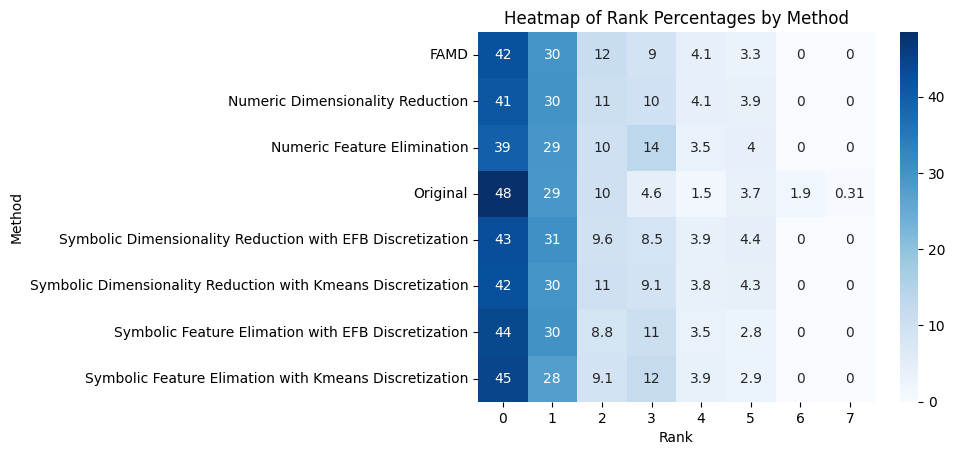

In [51]:
rank_counts = df.groupby(['method', 'rank']).size().unstack(fill_value=0)
rank_percentages = rank_counts.div(rank_counts.sum(axis=1), axis=0) * 100
        
sns.heatmap(rank_percentages, annot=True, cmap='Blues')
plt.title('Heatmap of Rank Percentages by Method')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()

count    7128.000000
mean       63.037037
std       104.790896
min        11.000000
25%        14.000000
50%        17.000000
75%        88.000000
max       511.000000
Name: xcols, dtype: float64


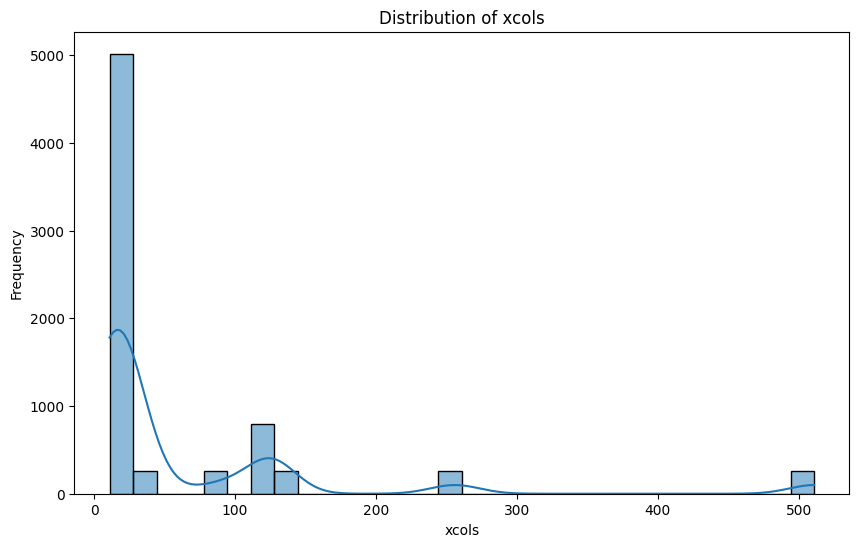

In [9]:
xcols_summary = df['xcols'].describe()
print(xcols_summary)

plt.figure(figsize=(10, 6))
sns.histplot(df['xcols'], bins=30, kde=True)
plt.title('Distribution of xcols')
plt.xlabel('xcols')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Define the dictionary with the mappings
method_mapping = {
    'Original': 'Original',
    'FAMD': 'FAMD',
    'Numeric Dimensionality Reduction': 'Num + D.R.',
    'Numeric Feature Elimination': 'Num + F.E.',
    'Symbolic Dimensionality Reduction with EFB Discretization': 'Sym + D.R. + EFB Discretize',
    'Symbolic Dimensionality Reduction with Kmeans Discretization': 'Sym + D.R. + Kmeans Discretize',
    'Symbolic Feature Elimation with EFB Discretization': 'Sym + F.E. + EFB Discretize',
    'Symbolic Feature Elimation with Kmeans Discretization': 'Sym + F.E. + Kmeans Discretize'
}

# Replace the values in the 'method' column
df['method'] = df['method'].replace(method_mapping)

# Verify the replacement
print(df['method'].unique())

['Sym + D.R. + Kmeans Discretize' 'Sym + D.R. + EFB Discretize'
 'Num + D.R.' 'Sym + F.E. + Kmeans Discretize'
 'Sym + F.E. + EFB Discretize' 'Num + F.E.' 'FAMd' 'Original']


20
Policy exploit
Policy Random


Policy FOCUS
Policy explore


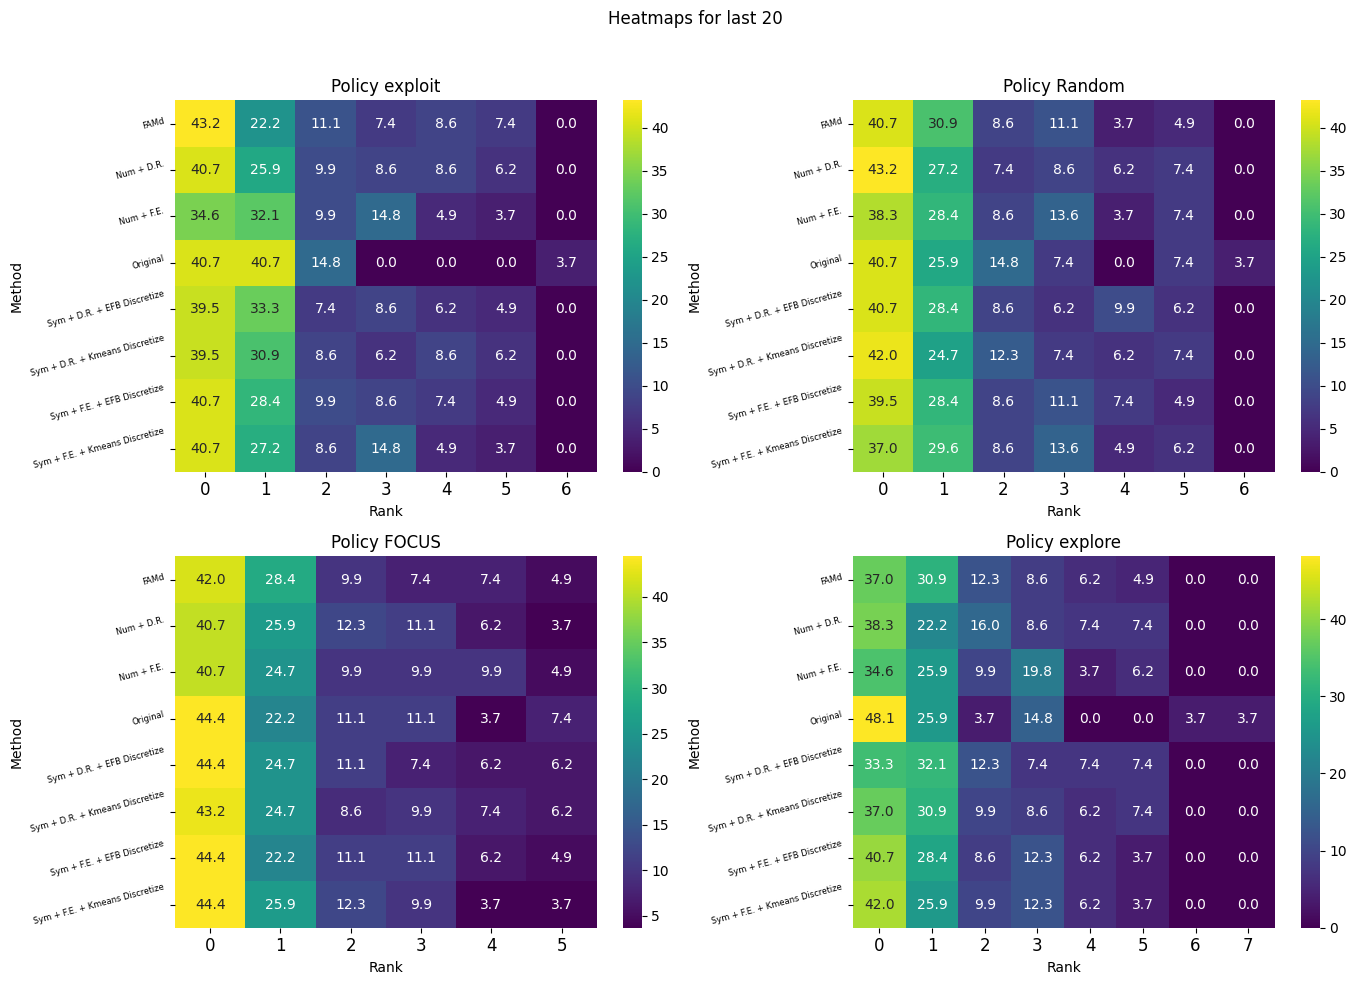

--------------------
30
Policy exploit
Policy Random
Policy FOCUS
Policy explore


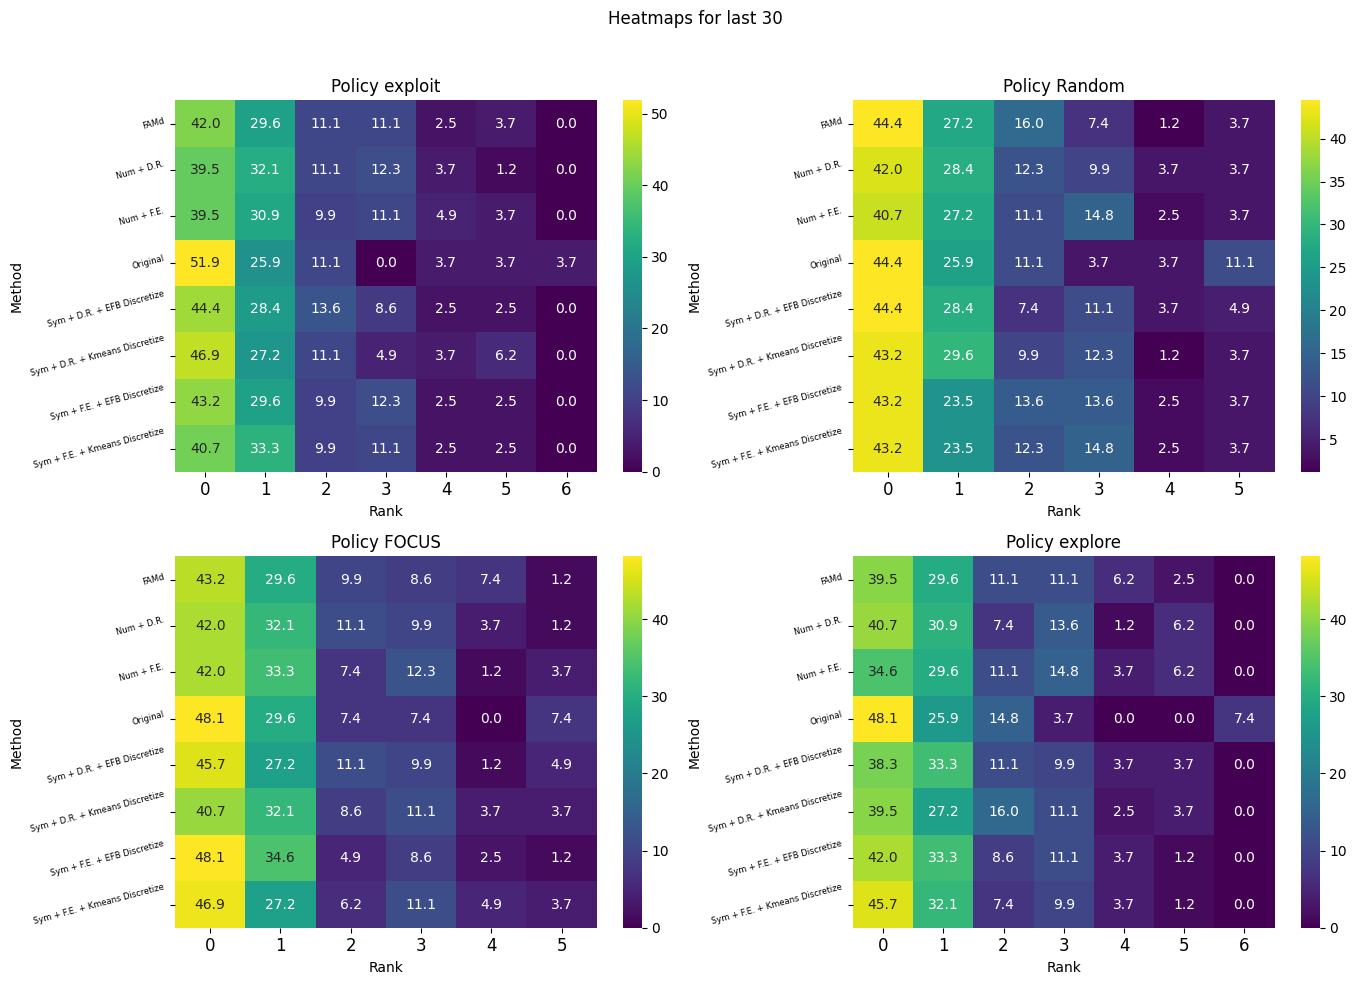

--------------------
40
Policy exploit
Policy Random
Policy FOCUS
Policy explore


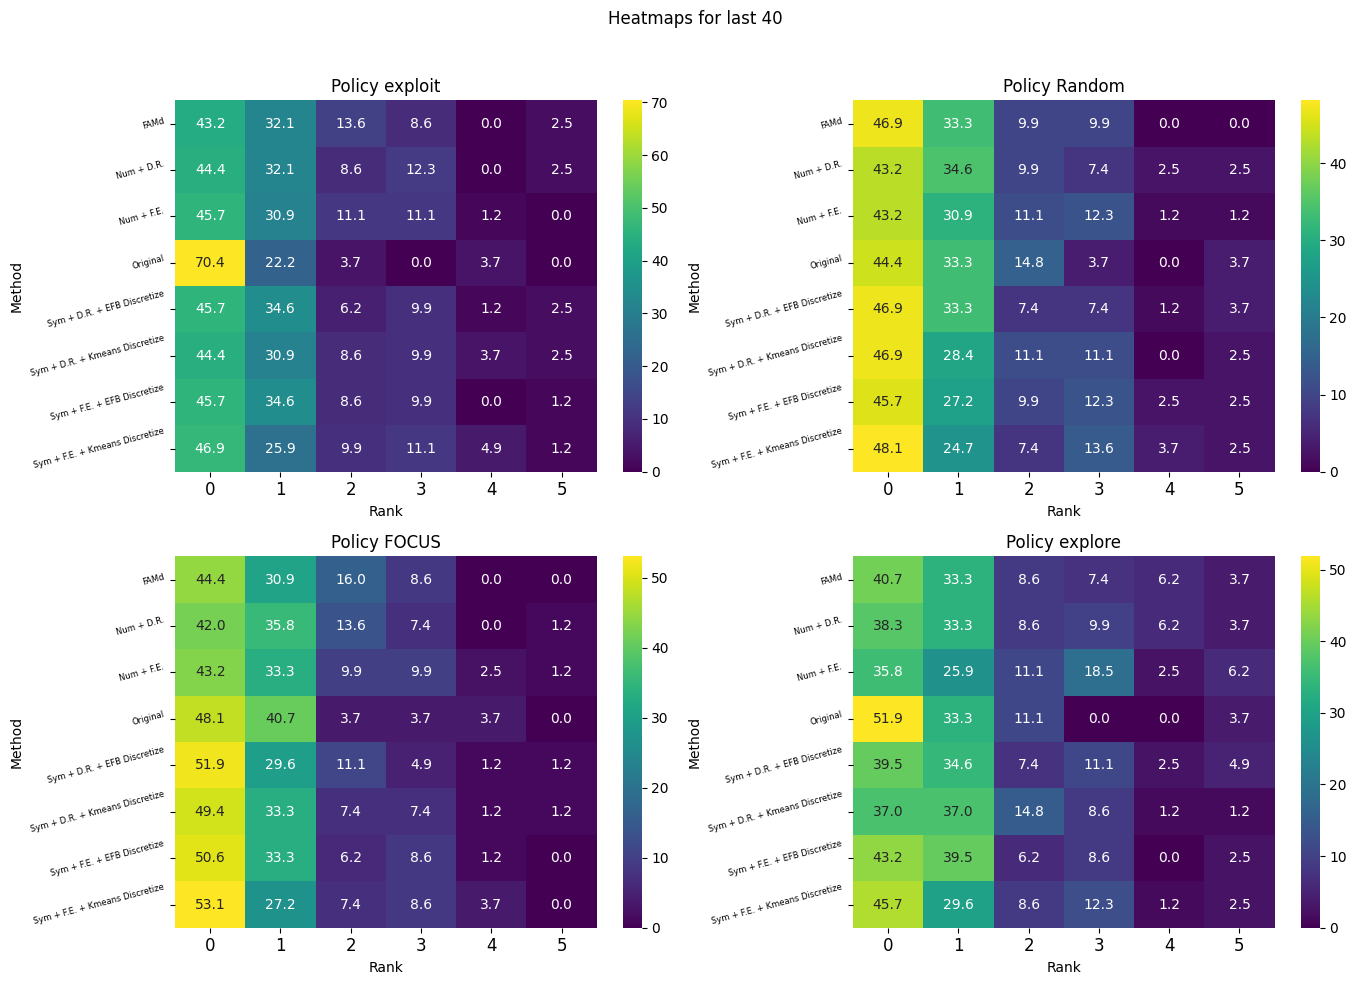

--------------------


In [59]:
# Filter the dataframe based on the value of 'last'
for last in [20, 30, 40]:
    print(last)
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    filtered_df = df[df['last'] == last]
    policies = ['exploit', 'Random', 'FOCUS', 'explore']
    
    for i, policy in enumerate(policies):
        print("Policy", policy)
        filtered_policy_df = filtered_df[filtered_df['policy'] == policy]
        # Group by method and rank, then count the occurrences
        filtered_rank_counts = filtered_policy_df.groupby(['method', 'rank']).size().unstack(fill_value=0)
        rank_percentages = filtered_rank_counts.div(filtered_rank_counts.sum(axis=1), axis=0) * 100
        
        # Ensure all ranks 0, 1, 2, 3, 4 are present for all methods
        for method in rank_percentages.index:
            for rank in range(5):
                if rank not in rank_percentages.columns:
                    rank_percentages[rank] = 0
        rank_percentages = rank_percentages.sort_index(axis=1)

        # Generate the heatmap
        ax = axs[i // 2, i % 2]
        sns.heatmap(rank_percentages, annot=True, cmap='viridis', fmt='.1f', ax=ax)
        ax.set_title(f'Policy {policy}')
        ax.set_xlabel('Rank')
        ax.set_ylabel('Method')
        ax.set_yticklabels([label.get_text() for label in ax.get_yticklabels()], rotation=15, fontsize=6)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    
    plt.suptitle(f'Heatmaps for last {last}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("--------------------")

In [11]:
group_size = df.groupby('xcols_group').size()
print(group_size)

xcols_group
small     5016
medium     528
large     1584
dtype: int64


/tmp/ipykernel_1902/3377902303.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [12]:
rank_counts = df.groupby(['method', 'rank']).size().unstack(fill_value=0)

print(rank_counts)

rank                                                  0    1    2    3   4  \
method                                                                       
FAMD                                                411  290  112   87  40   
Numeric Dimensionality Reduction                    401  292  104   97  40   
Numeric Feature Elimination                         383  286   98  132  34   
Original                                            157   95   33   15   5   
Symbolic Dimensionality Reduction with EFB Disc...  417  298   93   83  38   
Symbolic Dimensionality Reduction with Kmeans D...  413  289  103   88  37   
Symbolic Feature Elimation with EFB Discretization  427  294   86  104  34   
Symbolic Feature Elimation with Kmeans Discreti...  433  269   88  116  38   

rank                                                 5  6  7  
method                                                        
FAMD                                                32  0  0  
Numeric Dimensionality Reducti

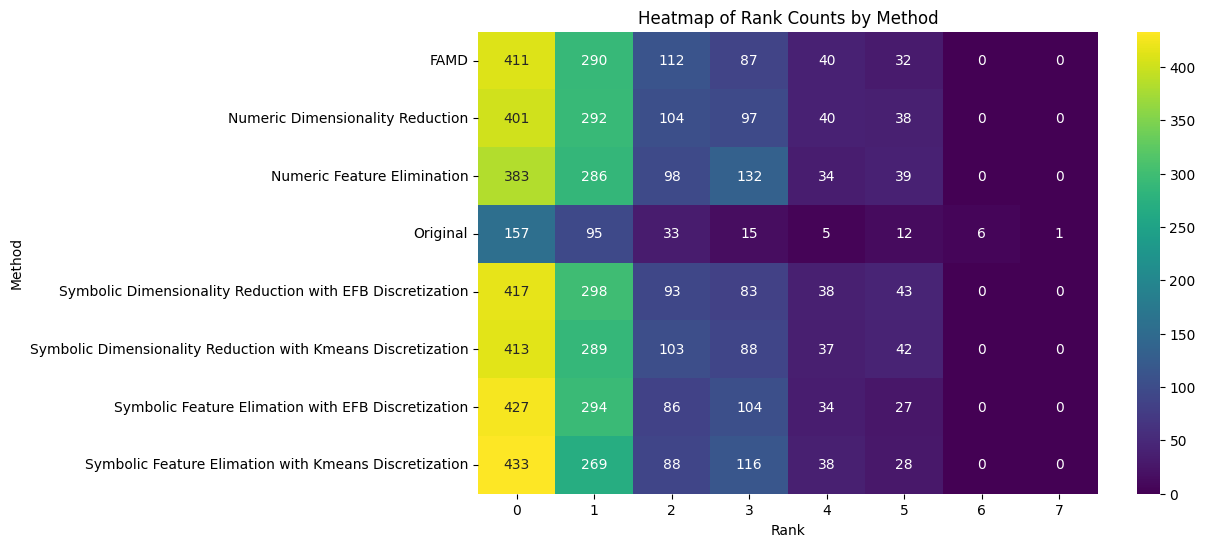

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(rank_counts, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Rank Counts by Method')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()

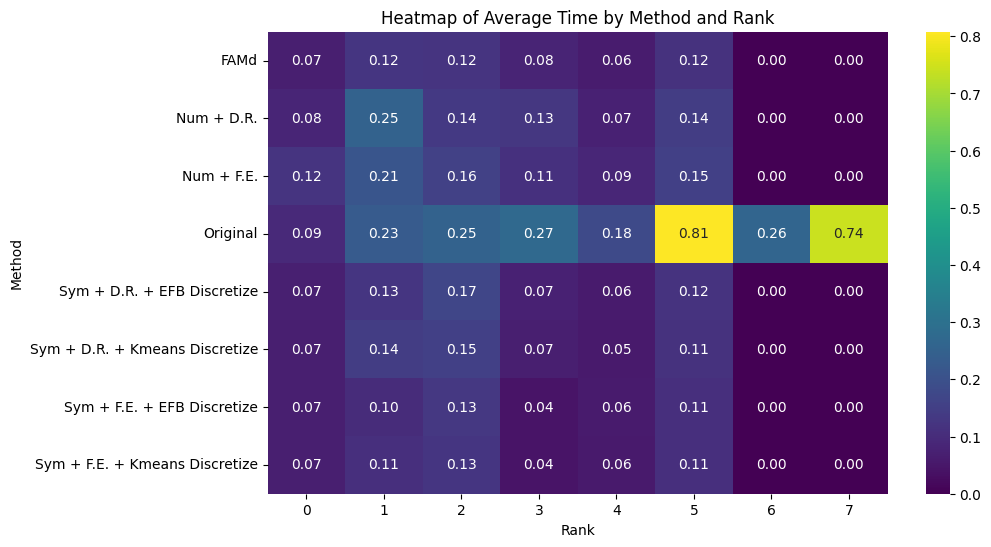

In [60]:
# Calculate the average time for each method and rank
avg_time = df.groupby(['method', 'rank'])['time'].mean().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_time, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Average Time by Method and Rank')
plt.xlabel('Rank')
plt.ylabel('Method')
plt.show()

In [15]:
#for large datasets, bad performance for new methods but time taken is less

In [16]:
# Initialize a dictionary to store the counts
method_counts = {method: 0 for method in df['method'].unique() if method != 'Original'}

# Iterate over each unique dataset
for dataset in df['dataset'].unique():
    # Filter the dataframe for the current dataset
    dataset_df = df[df['dataset'] == dataset]
    
    # Get the rank of the original method
    original_rank = dataset_df[dataset_df['method'] == 'Original']['rank'].values[0]
    
    # Iterate over each method and compare ranks
    for method in method_counts.keys():
        method_rank = dataset_df[dataset_df['method'] == method]['rank'].values[0]
        if method_rank <= original_rank:
            method_counts[method] += 1

# Print the counts
print(method_counts)

{'Symbolic Dimensionality Reduction with Kmeans Discretization': 22, 'Symbolic Dimensionality Reduction with EFB Discretization': 22, 'Numeric Dimensionality Reduction': 22, 'Symbolic Feature Elimation with Kmeans Discretization': 18, 'Symbolic Feature Elimation with EFB Discretization': 19, 'Numeric Feature Elimination': 19, 'FAMD': 20}


In [17]:

lowest_rank_counts = {method: 0 for method in df['method'].unique()}
lowest_rank_time = {method: 0 for method in df['method'].unique()}

for dataset in df['dataset'].unique():
    dataset_df = df[df['dataset'] == dataset]
    lowest_rank = dataset_df['rank'].min()
    lowest_rank_methods = dataset_df[dataset_df['rank'] == lowest_rank][['method','time']]
    for method in lowest_rank_methods['method']:
        if method in lowest_rank_counts:
            lowest_rank_counts[method] += 1
            lowest_rank_time[method] += lowest_rank_methods[lowest_rank_methods['method'] == method]['time'].values[0]
    
print(lowest_rank_counts)

{'Symbolic Dimensionality Reduction with Kmeans Discretization': 413, 'Symbolic Dimensionality Reduction with EFB Discretization': 417, 'Numeric Dimensionality Reduction': 401, 'Symbolic Feature Elimation with Kmeans Discretization': 433, 'Symbolic Feature Elimation with EFB Discretization': 427, 'Numeric Feature Elimination': 383, 'FAMD': 411, 'Original': 157}


In [40]:
avg_time = {method: lowest_rank_time[method] / max(1,lowest_rank_counts[method]) for method in lowest_rank_counts}
times = list(avg_time.items())
times.sort(key=lambda x: x[1])
print(times)

[('FAMD', np.float64(0.03908013305524843)), ('Symbolic Dimensionality Reduction with Kmeans Discretization', np.float64(0.040219069566334024)), ('Symbolic Dimensionality Reduction with EFB Discretization', np.float64(0.04208180009604066)), ('Symbolic Feature Elimation with Kmeans Discretization', np.float64(0.04596350834496305)), ('Numeric Dimensionality Reduction', np.float64(0.05775162885313902)), ('Original', np.float64(0.060443375065068555)), ('Symbolic Feature Elimation with EFB Discretization', np.float64(0.06176516135905906)), ('Numeric Feature Elimination', np.float64(0.0955509004020195))]


In [19]:
method_total_counts = df[['method','policy']].value_counts().to_dict()
method_total_counts

{('FAMD', 'FOCUS'): 243,
 ('FAMD', 'Random'): 243,
 ('FAMD', 'exploit'): 243,
 ('FAMD', 'explore'): 243,
 ('Numeric Dimensionality Reduction', 'FOCUS'): 243,
 ('Numeric Dimensionality Reduction', 'Random'): 243,
 ('Numeric Dimensionality Reduction', 'exploit'): 243,
 ('Numeric Dimensionality Reduction', 'explore'): 243,
 ('Numeric Feature Elimination', 'FOCUS'): 243,
 ('Numeric Feature Elimination', 'Random'): 243,
 ('Numeric Feature Elimination', 'exploit'): 243,
 ('Numeric Feature Elimination', 'explore'): 243,
 ('Symbolic Dimensionality Reduction with EFB Discretization', 'explore'): 243,
 ('Symbolic Dimensionality Reduction with EFB Discretization', 'exploit'): 243,
 ('Symbolic Dimensionality Reduction with EFB Discretization', 'Random'): 243,
 ('Symbolic Dimensionality Reduction with EFB Discretization', 'FOCUS'): 243,
 ('Symbolic Feature Elimation with EFB Discretization', 'FOCUS'): 243,
 ('Symbolic Feature Elimation with EFB Discretization', 'Random'): 243,
 ('Symbolic Feature E

In [20]:

lowest_rank_counts = {}

for dataset in df['dataset'].unique():
    dataset_df = df[df['dataset'] == dataset]
    for policy in dataset_df['policy'].unique():
        policy_df = dataset_df[dataset_df['policy'] == policy]
        lowest_rank = policy_df['rank'].min()
        lowest_rank_methods = policy_df[policy_df['rank'] == lowest_rank]['method']
        for method in lowest_rank_methods:
            if (method, policy) not in lowest_rank_counts:
                lowest_rank_counts[(method, policy)] = 0
            lowest_rank_counts[(method, policy)] += 1

lowest_rank_percentages = {method: (count / method_total_counts[method]) * 100 for method, count in lowest_rank_counts.items()}

In [ ]:
lowest_rank_percentages_df = pd.DataFrame(list(lowest_rank_percentages.items()), columns=['Method_Policy', 'Percentage'])
lowest_rank_percentages_df[['Method', 'Policy']] = pd.DataFrame(lowest_rank_percentages_df['Method_Policy'].tolist(), index=lowest_rank_percentages_df.index)
lowest_rank_percentages_df.drop(columns=['Method_Policy'], inplace=True)
lowest_rank_percentages_df

Percentage                                             Method   Policy
0    43.209877                        Numeric Feature Elimination  exploit
1    45.267490                   Numeric Dimensionality Reduction  exploit
2    58.024691                                           Original  exploit
3    67.078189  Symbolic Dimensionality Reduction with Kmeans ...   Random
4    67.901235  Symbolic Dimensionality Reduction with EFB Dis...   Random
5    67.489712                   Numeric Dimensionality Reduction   Random
6    62.551440  Symbolic Feature Elimation with Kmeans Discret...   Random
7    62.962963  Symbolic Feature Elimation with EFB Discretiza...   Random
8    60.905350                        Numeric Feature Elimination   Random
9    69.135802                                               FAMD   Random
10   66.666667                                           Original   Random
11   46.502058                        Numeric Feature Elimination    FOCUS
12   51.028807                                               FAMD    FOCUS
13   49.794239  Symbolic Feature Elimation with Kmeans Discret...  explore
14   46.502058  Symbolic Feature Elimation with Kmeans Discret...  exploit
15   45.679012                                               FAMD  exploit
16   53.909465  Symbolic Feature Elimation with Kmeans Discret...    FOCUS
17   53.086420  Symbolic Feature Elimation with EFB Discretiza...    FOCUS
18   58.024691                                           Original  explore
19   46.913580  Symbolic Feature Elimation with EFB Discretiza...  exploit
20   54.732510  Symbolic Dimensionality Reduction with EFB Dis...    FOCUS
21   47.736626  Symbolic Feature Elimation with EFB Discretiza...  explore
22   46.913580  Symbolic Dimensionality Reduction with EFB Dis...  exploit
23   52.674897  Symbolic Dimensionality Reduction with Kmeans ...    FOCUS
24   55.555556                                           Original    FOCUS
25   46.090535                                               FAMD  explore
26   45.679012  Symbolic Dimensionality Reduction with Kmeans ...  explore
27   47.325103  Symbolic Dimensionality Reduction with Kmeans ...  exploit
28   48.971193                   Numeric Dimensionality Reduction    FOCUS
29   44.444444  Symbolic Dimensionality Reduction with EFB Dis...  explore
30   46.090535                   Numeric Dimensionality Reduction  explore
31   38.271605                        Numeric Feature Elimination  explore

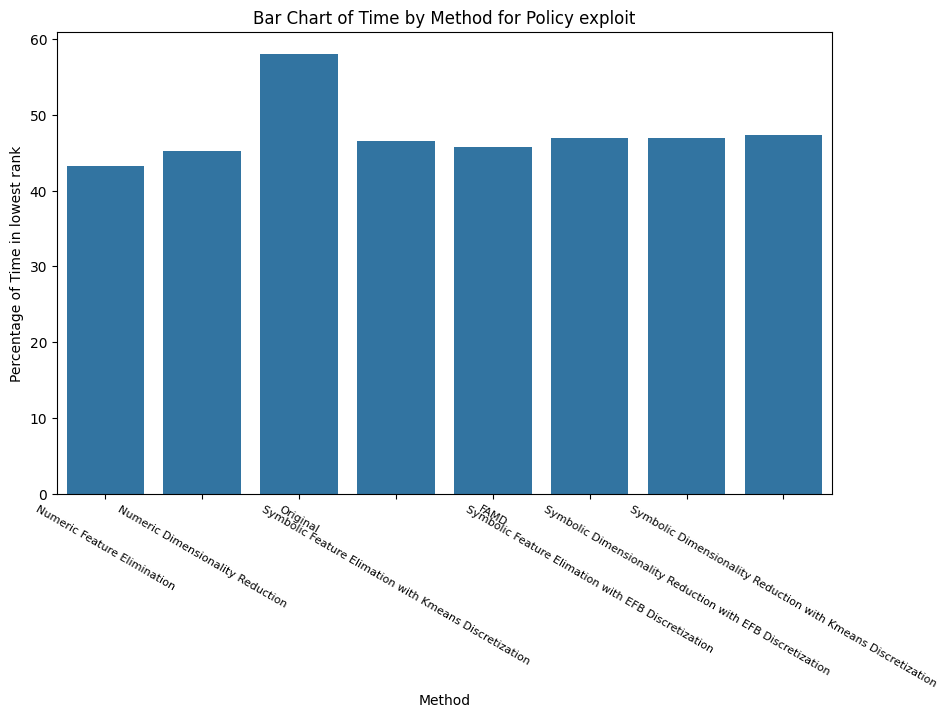

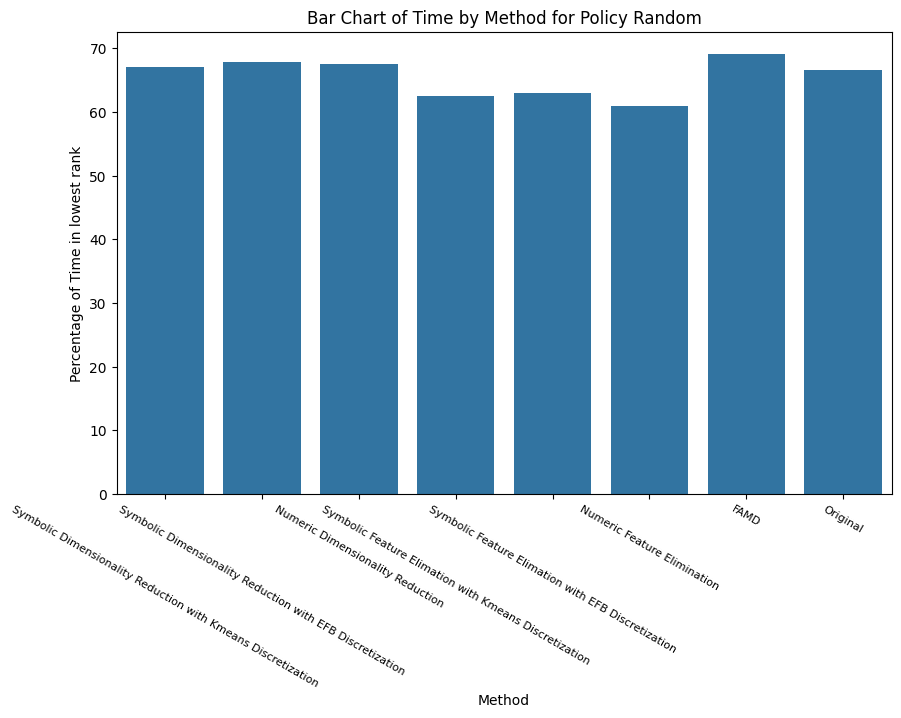

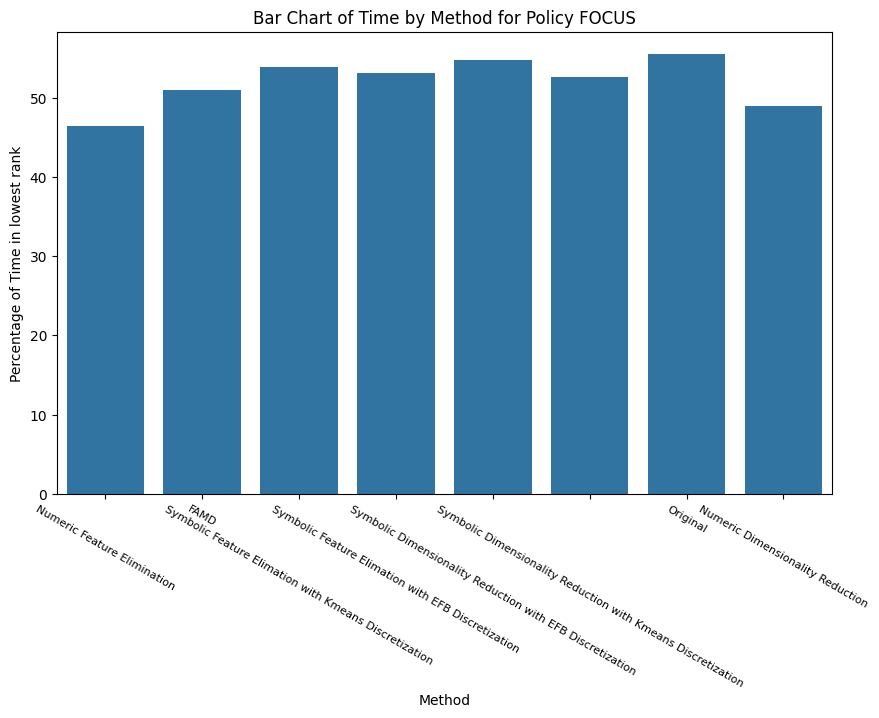

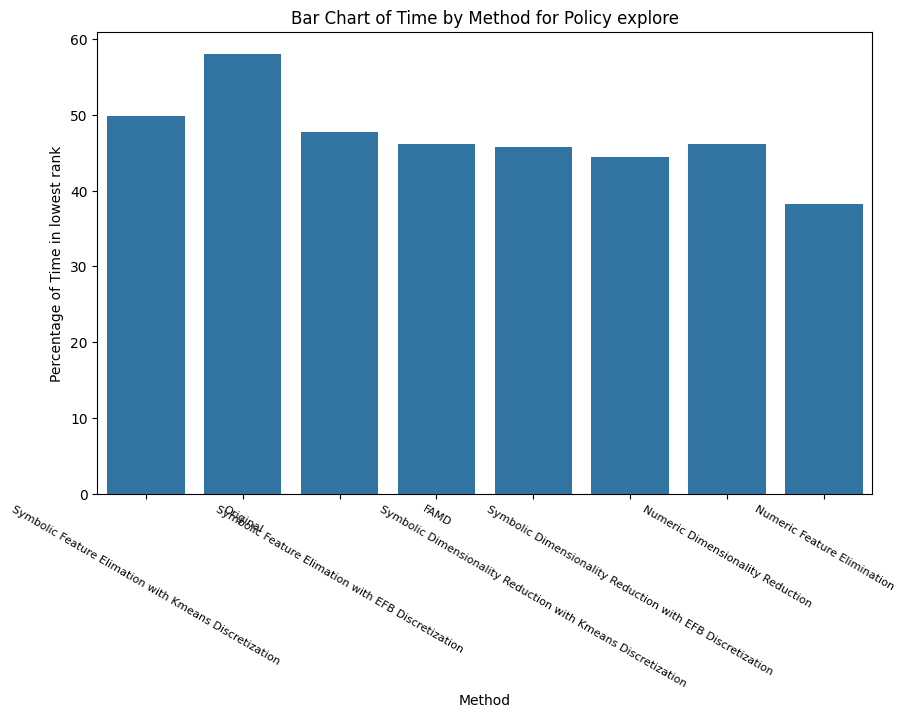

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create the bar chart
for policy in lowest_rank_percentages_df['Policy'].unique():
    filtered_df = lowest_rank_percentages_df[lowest_rank_percentages_df['Policy'] == policy]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_df, x='Method', y='Percentage')
    plt.title(f'Bar Chart of Time by Method for Policy {policy}')
    #tilt the x-axis labels
    plt.xticks(rotation=-30)
    #reduce the font size of x-axis labels
    plt.xticks(fontsize=8)
    plt.xlabel('Method')
    plt.ylabel('Percentage of Time in lowest rank')
    plt.show()

In [30]:

lowest_rank_counts = {}
method_total_counts = df['method'].value_counts().to_dict()
for dataset in df['dataset'].unique():
    dataset_df = df[df['dataset'] == dataset]
    lowest_rank = dataset_df['rank'].min()
    lowest_rank_methods = dataset_df[dataset_df['rank'] == lowest_rank]['method']
    for method in lowest_rank_methods:
        if method not in lowest_rank_counts:
            lowest_rank_counts[method] = 0
        lowest_rank_counts[method] += 1

lowest_rank_percentages = {method: (count / method_total_counts[method]) * 100 for method, count in lowest_rank_counts.items()}

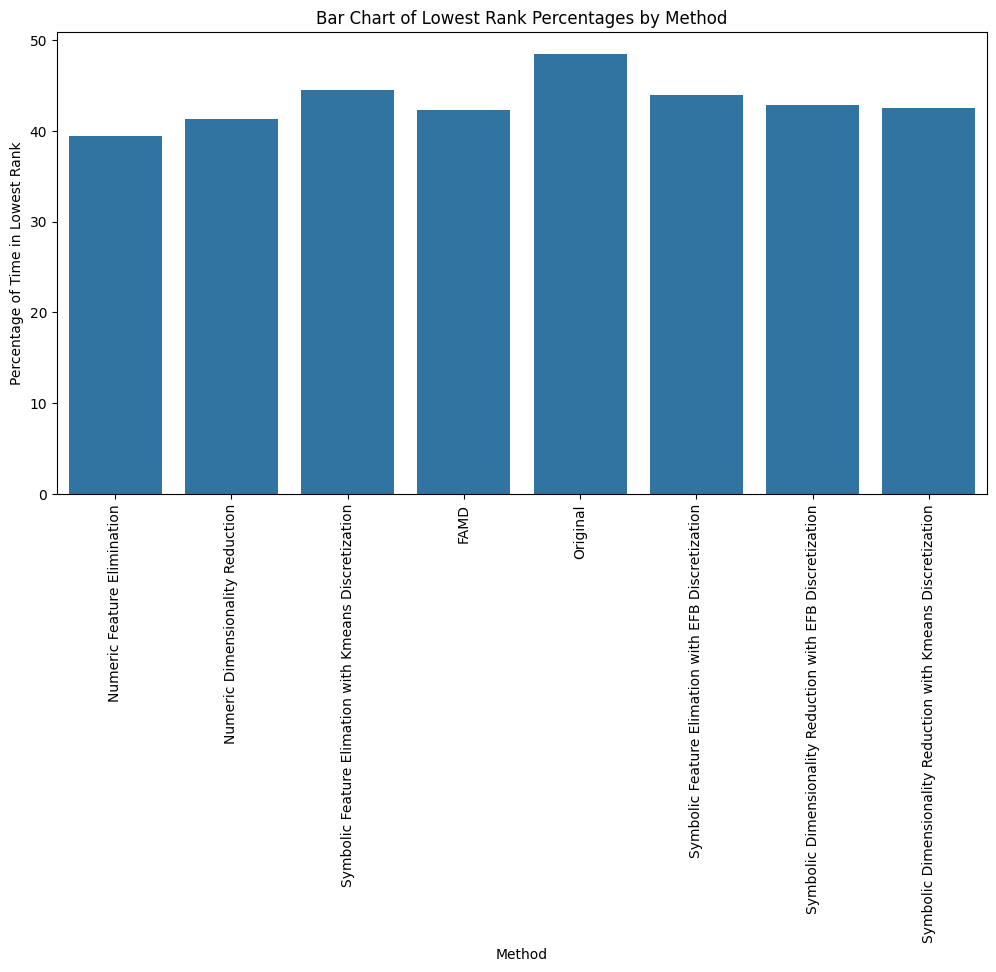

In [31]:
# Extract keys and values from the dictionary
methods = list(lowest_rank_percentages.keys())
percentages = list(lowest_rank_percentages.values())

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=methods, y=percentages)
plt.title('Bar Chart of Lowest Rank Percentages by Method')
plt.xlabel('Method')
plt.ylabel('Percentage of Time in Lowest Rank')
plt.xticks(rotation=90)
plt.show()

In [32]:
lowest_rank_percentages

{'Numeric Feature Elimination': 39.40329218106996,
 'Numeric Dimensionality Reduction': 41.255144032921805,
 'Symbolic Feature Elimation with Kmeans Discretization': 44.547325102880656,
 'FAMD': 42.28395061728395,
 'Original': 48.45679012345679,
 'Symbolic Feature Elimation with EFB Discretization': 43.93004115226338,
 'Symbolic Dimensionality Reduction with EFB Discretization': 42.901234567901234,
 'Symbolic Dimensionality Reduction with Kmeans Discretization': 42.489711934156375}